# Credits

Credits to **Vikashraj Luhaniwal** from **TowardDataScience.com** for his article on **Feature Selection Using Wrapper Methods** for the feature selection code I use in this notebook. Also credits to **Dr. Tirthajyoti Sarkar** from **TowardDataScience.com** for his article on **How to Check the Quality of a Regression Model with Python** and the code I use from his github to do the residual analysis in this notebook. Links to these articles are posted here:

https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import scipy.stats 
from sklearn.linear_model import LinearRegression

C:\Users\Marcelino\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [6]:
raw_data = pd.read_csv('Infections.csv')
raw_data.head()

,The SAS System,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Identification number,Length of stay,Age,Infection risk,Routine culturing,Routine chest X-ray,Number of beds,Medical school affiliation,Average daily census,Number of nurses,Available facilities
2,NaN,NaN,NaN,NaN,ratio,ratio,NaN,NaN,NaN,NaN,and services
3,1,7.13,55.7,4.1,9,39.6,279,1,207,241,60
4,2,8.82,58.2,1.6,3.8,51.7,80,1,51,52,40


In [7]:
# Renaming of columns and cleanup
raw_data.dropna(0, how='any', inplace=True)

raw_data.rename(index=str, columns={'The SAS System': 'id num',
                              'Unnamed: 1': 'length of stay',
                              'Unnamed: 2': 'age',
                              'Unnamed: 3': 'infection risk',
                              'Unnamed: 4': 'routine culturing',
                              'Unnamed: 5': 'routine chest x-ray',
                              'Unnamed: 6': 'num of beds',
                              'Unnamed: 7': 'med school affiliation',
                              'Unnamed: 8': 'avg daily census',
                              'Unnamed: 9': 'num of nurses',
                              'Unnamed: 10': 'available facilities & services'}, inplace=True)

raw_data.drop('1', inplace=True)

raw_data.head()

,id num,length of stay,age,infection risk,routine culturing,routine chest x-ray,num of beds,med school affiliation,avg daily census,num of nurses,available facilities & services
3,1,7.13,55.7,4.1,9,39.6,279,1,207,241,60
4,2,8.82,58.2,1.6,3.8,51.7,80,1,51,52,40
5,3,8.34,56.9,2.7,8.1,74,107,1,82,54,20
6,4,8.95,53.7,5.6,18.9,122.8,147,1,53,148,40
7,5,11.2,56.5,5.7,34.5,88.9,180,1,134,151,40


# An analysis of 108 obs, ID's 6-113

In [8]:
data = raw_data.copy()
data.drop(['3','4','5','6','7'], axis=0, inplace=True)
raw_data.head()

,id num,length of stay,age,infection risk,routine culturing,routine chest x-ray,num of beds,med school affiliation,avg daily census,num of nurses,available facilities & services
3,1,7.13,55.7,4.1,9,39.6,279,1,207,241,60
4,2,8.82,58.2,1.6,3.8,51.7,80,1,51,52,40
5,3,8.34,56.9,2.7,8.1,74,107,1,82,54,20
6,4,8.95,53.7,5.6,18.9,122.8,147,1,53,148,40
7,5,11.2,56.5,5.7,34.5,88.9,180,1,134,151,40


In [9]:
data

,id num,length of stay,age,infection risk,routine culturing,routine chest x-ray,num of beds,med school affiliation,avg daily census,num of nurses,available facilities & services
8,6,9.76,50.9,5.1,21.9,97,150,1,147,106,40
9,7,9.68,57.8,4.6,16.7,79,186,1,151,129,40
10,8,11.18,45.7,5.4,60.5,85.8,640,0,399,360,60
11,9,8.67,48.2,4.3,24.4,90.8,182,1,130,118,40
12,10,8.84,56.3,6.3,29.6,82.6,85,1,59,66,40
...,...,...,...,...,...,...,...,...,...,...,...
111,109,11.8,53.8,5.7,9.1,116.9,571,0,441,469,62.9
112,110,9.5,49.3,5.8,42,70.9,98,1,68,46,22.9
113,111,7.7,56.9,4.4,12.2,67.9,129,1,85,136,62.9
114,112,17.94,56.2,5.9,26.4,91.8,835,0,791,407,62.9


# Exploratory Analysis
**Target Variable: infection risk**

In [10]:
# Descriptive Statistics
data = data.astype(float)

print(data.shape) # 108 rows, 11 columns
data.describe()

(108, 11)


,id num,length of stay,age,infection risk,routine culturing,routine chest x-ray,num of beds,med school affiliation,avg daily census,num of nurses,available facilities & services
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,59.50000,9.683519,53.094444,4.374074,15.836111,81.916667,256.500000,0.842593,195.351852,175.287037,43.305556
std,31.32092,1.927279,4.505756,1.324067,10.195724,18.725272,195.638399,0.365882,155.636908,141.326496,15.293758
min,6.00000,6.700000,38.800000,1.300000,1.600000,40.400000,29.000000,0.000000,20.000000,14.000000,5.700000
25%,32.75000,8.352500,50.675000,3.700000,8.400000,70.550000,104.500000,1.000000,68.750000,66.750000,31.400000
50%,59.50000,9.470000,52.800000,4.400000,14.350000,82.400000,190.500000,1.000000,144.500000,130.500000,45.700000
75%,86.25000,10.532500,56.025000,5.200000,20.350000,94.550000,318.000000,1.000000,259.750000,218.500000,54.300000
max,113.00000,19.560000,65.900000,7.800000,60.500000,133.500000,835.000000,1.000000,791.000000,656.000000,80.000000


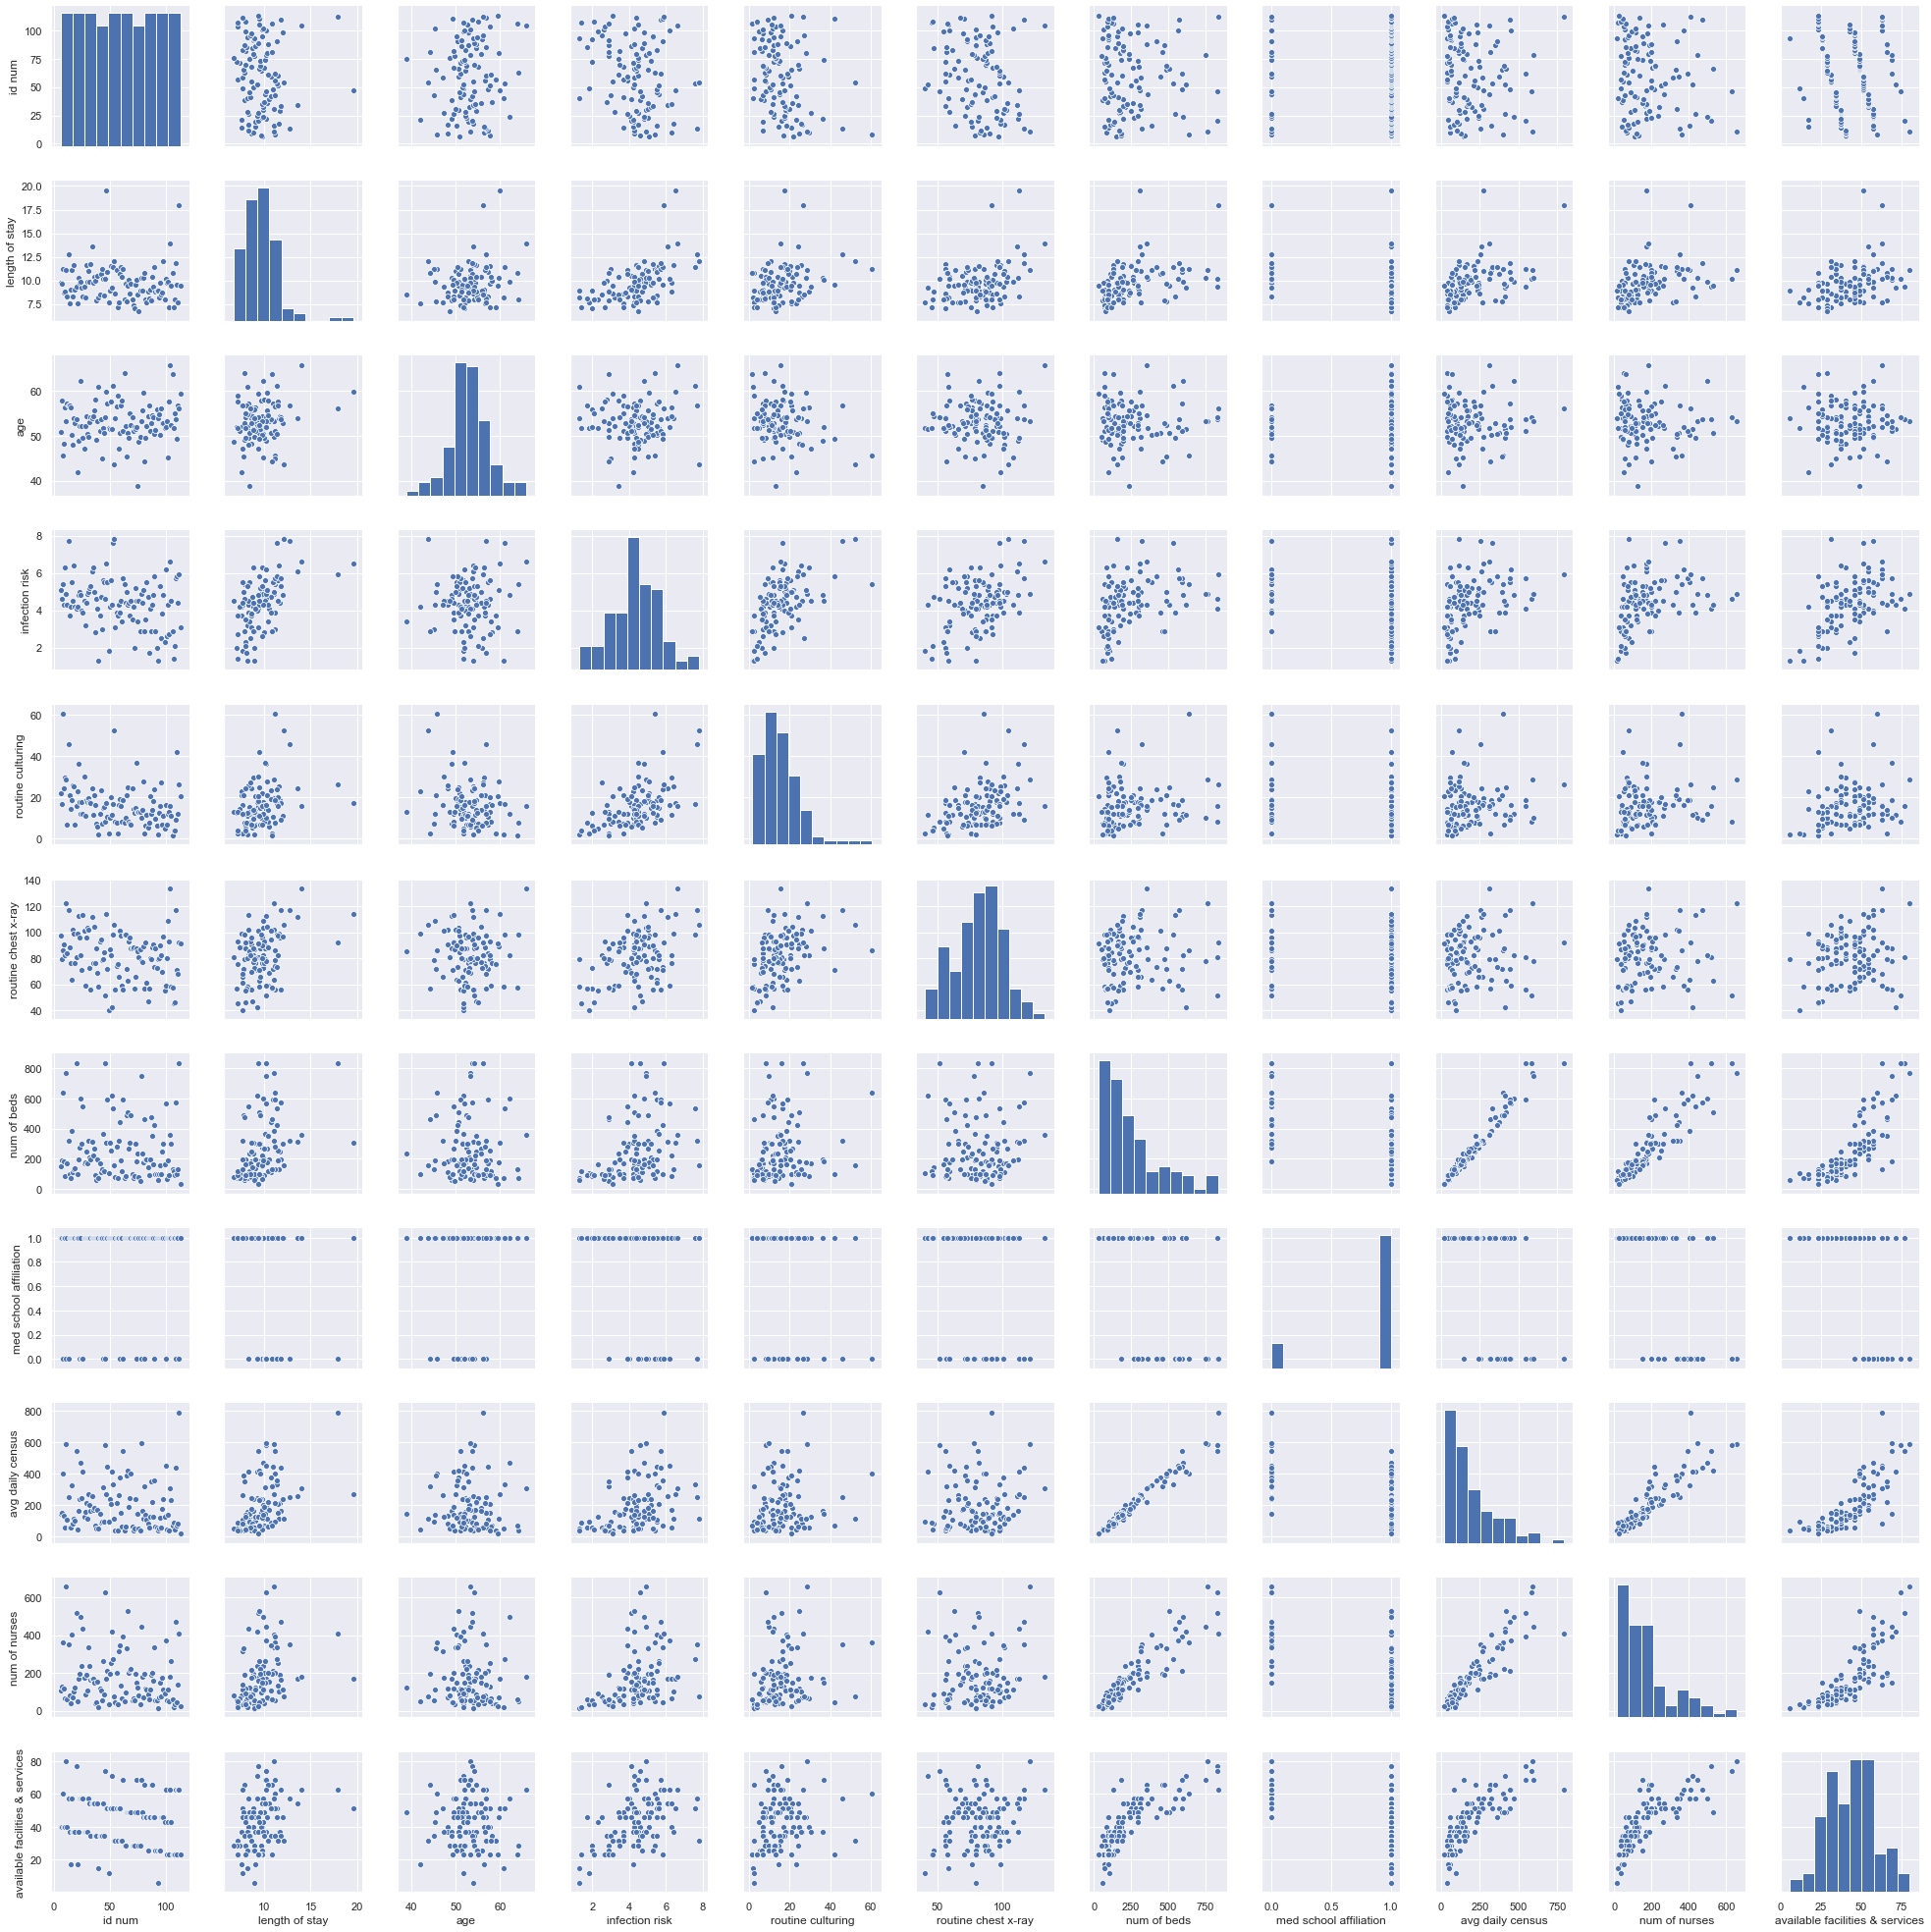

In [11]:
# Pairwise scatter plots and correlation heatmap to check for 
# multicollinearity

sns.pairplot(data)

In [12]:
# Table of Pearson correlations between each feature
data.corr()

,id num,length of stay,age,infection risk,routine culturing,routine chest x-ray,num of beds,med school affiliation,avg daily census,num of nurses,available facilities & services
id num,1.000000,-0.058847,0.096117,-0.262361,-0.303578,-0.218728,-0.078597,0.041184,-0.075555,-0.170175,-0.123132
length of stay,-0.058847,1.000000,0.205936,0.537466,0.309939,0.378434,0.412781,-0.294627,0.478460,0.345562,0.370543
age,0.096117,0.205936,1.000000,0.025729,-0.226309,0.006558,-0.042381,0.134387,-0.037812,-0.070225,-0.031764
infection risk,-0.262361,0.537466,0.025729,1.000000,0.541953,0.433893,0.358291,-0.236142,0.384809,0.388724,0.418630
routine culturing,-0.303578,0.309939,-0.226309,0.541953,1.000000,0.414342,0.138424,-0.248489,0.142887,0.196693,0.191338
routine chest x-ray,-0.218728,0.378434,0.006558,0.433893,0.414342,1.000000,0.047835,-0.085415,0.072446,0.080584,0.139510
num of beds,-0.078597,0.412781,-0.042381,0.358291,0.138424,0.047835,1.000000,-0.589036,0.981227,0.915530,0.799212
med school affiliation,0.041184,-0.294627,0.134387,-0.236142,-0.248489,-0.085415,-0.589036,1.000000,-0.612828,-0.589230,-0.531290
avg daily census,-0.075555,0.478460,-0.037812,0.384809,0.142887,0.072446,0.981227,-0.612828,1.000000,0.909544,0.784315
num of nurses,-0.170175,0.345562,-0.070225,0.388724,0.196693,0.080584,0.915530,-0.589230,0.909544,1.000000,0.783929


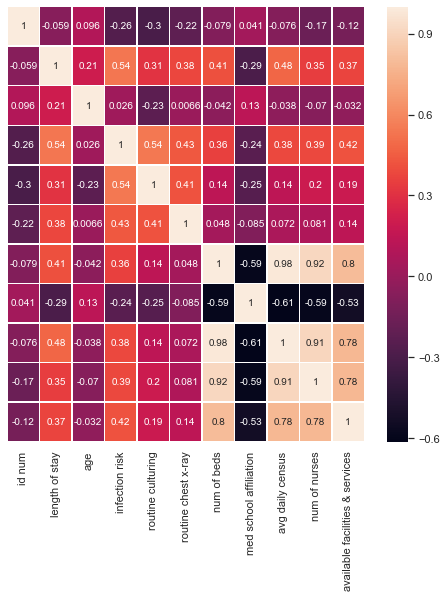

In [13]:
# Heatmap to see correlations easier
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidth=.5, ax=ax, yticklabels=False)
plt.show()

With length of stay, routine culturing, routine chest x-ray, and available facilities & services having the highest correlation with infection risk, we shall further analyze these variables with scatter plots.

In [14]:
# Creation of feature matrix
x = data.drop('infection risk', 1)

# Creation of response var
y = data['infection risk']

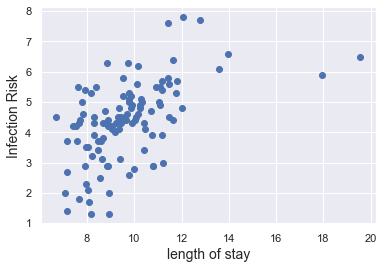

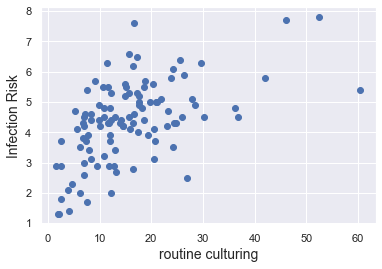

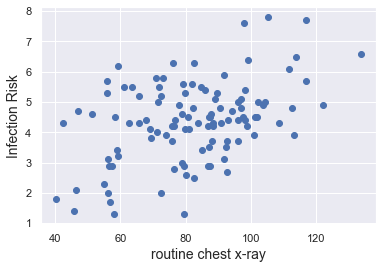

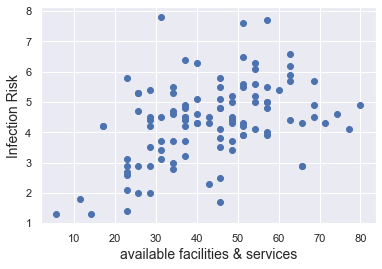

In [15]:
# Scatterplots of highest correlating variables
cols = ['length of stay',
       'routine culturing',
       'routine chest x-ray',
       'available facilities & services']

for i in cols:
    plt.scatter(data[i], y)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Infection Risk', fontsize=14)
    plt.show()

These graphs gives us an idea of which features could end up in our model for predicting infection risk. We shall now use wrapper methods (forward selction, backwards selection, & stepwise selection) to pick the best features.

# 1. Forward Selection

**Steps for Forward Selection**

1. Pick an alpha (ours will be alpha = 0.05).

2. Fit each feature one at a time to and keep the one with the lowest p-value.

3. Fit all possible models with one extra feature added to the previously selected feature(s).

4. Again, select the feature with miniumum p-value. If p_value < alpha, continue, otherwise stop

The code to achieve this follows:

In [16]:
def forward_selection(data, response, alpha=0.05):
    ini_feats = data.columns.tolist()
    best_feats = []
    
    while len(ini_feats) > 0:
        remaining_feats = list(set(ini_feats) - set(best_feats))
        new_pval = pd.Series(index=remaining_feats, dtype=float)
        
        for new_col in remaining_feats:
            model = sm.OLS(response, sm.add_constant(data[best_feats+[new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        min_p_val = new_pval.min()
        
        if min_p_val < alpha:
            best_feats.append(new_pval.idxmin())
        else:
            break
    return best_feats, model.summary()

In [17]:
forward_selection(x,y)

(['routine culturing', 'length of stay', 'available facilities & services'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         infection risk   R-squared:                       0.486
 Model:                            OLS   Adj. R-squared:                  0.466
 Method:                 Least Squares   F-statistic:                     24.34
 Date:                Tue, 28 Apr 2020   Prob (F-statistic):           3.41e-14
 Time:                        17:54:30   Log-Likelihood:                -147.13
 No. Observations:                 108   AIC:                             304.3
 Df Residuals:                     103   BIC:                             317.7
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>

# Backward Elimination 

**Steps for Backward Elimination**

1. Pick our alpha (our alpha is alpha = 0.05).

2. Fit full model with all features.

3. Consider feature with highest p-value. If < alpha, go to next step, otherwise stop.

4. Remove the feature under consideration.

5. Fit a model without this feature. Repeat process from step 3.

The code follows:

In [18]:
def backward_elimination(data, response, alpha=0.05):
    feats = data.columns.tolist()
    while len(feats) > 0:
        
        feats_with_constant = sm.add_constant(data[feats])
        p_vals = sm.OLS(response, feats_with_constant).fit().pvalues[1:]
        model = sm.OLS(response, feats_with_constant).fit()
        max_p_val = p_vals.max()
        
        if max_p_val >= alpha:
            excluded_feat = p_vals.idxmax()
            feats.remove(excluded_feat)
        else:
            break
    return feats, model.summary()

In [19]:
backward_elimination(x,y)

(['length of stay', 'routine culturing', 'available facilities & services'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         infection risk   R-squared:                       0.486
 Model:                            OLS   Adj. R-squared:                  0.471
 Method:                 Least Squares   F-statistic:                     32.77
 Date:                Tue, 28 Apr 2020   Prob (F-statistic):           5.44e-15
 Time:                        17:54:30   Log-Likelihood:                -147.13
 No. Observations:                 108   AIC:                             302.3
 Df Residuals:                     104   BIC:                             313.0
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>

# 3. Stepwise Selection

**Steps for Stepwise Selection**
A combination of forward selection and backwards elimination, this is how we'll do stepwise:

1. Pick our alpha (alpha = 0.05).

2. Perform next step of forward selection (newly added feat must have p-value < alpha).

3. Perform all steps of backward elimination (any previous feat must have p-value > alpha).

4. Repeat step 2 & 3 until final best set of feats.

The code is as follows:

In [20]:
def stepwise_selection(data, response, alpha_in=0.05, alpha_out=0.05):
    ini_feats = data.columns.tolist()
    best_feats = []
    while len(ini_feats) > 0:
        
        remaining_feats = list(set(ini_feats) - set(best_feats))
        new_pval = pd.Series(index=remaining_feats)
        
        for new_col in remaining_feats:
            model = sm.OLS(response, sm.add_const(data[best_feats+[new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        min_p_val = new_pval.min()
        
        if min_p_val < alpha_in:
            best_feats.append(new_pval.idxmin())
            
            while len(best_feats) > 0:
                best_feats_with_constant = sm.add_constant(data[best_feats])
                p_vals = sm.OLS(response, best_feats_with_constant).fit().pvalues[1:]
                max_p_val = p_vals.max()
                
                if max_p_val >= alpha_out:
                    excluded_feat = p_vals.idxmax()
                    best_feats.remove(excluded_feat)
                else:
                    break
        else:
            break
    return best_feats, model.summary()

In [21]:
backward_elimination(x,y)

(['length of stay', 'routine culturing', 'available facilities & services'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         infection risk   R-squared:                       0.486
 Model:                            OLS   Adj. R-squared:                  0.471
 Method:                 Least Squares   F-statistic:                     32.77
 Date:                Tue, 28 Apr 2020   Prob (F-statistic):           5.44e-15
 Time:                        17:54:31   Log-Likelihood:                -147.13
 No. Observations:                 108   AIC:                             302.3
 Df Residuals:                     104   BIC:                             313.0
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>

**Conclusion** 

From our Feature Selection procedures, we can see that the best predictors of infection risk are the variables "length of stay", "routine culturing", and "available facilities & services". In that case, we shall create the variables containing our best features and our model:

In [22]:
# Save the model that the regression methods created into variables

# Best variables recommended by wrapper methods
best_feats = data[['length of stay', 
                   'routine culturing', 
                   'available facilities & services']]

# Actual model
best_model = sm.OLS(y, best_feats).fit()

# Residual Analysis

**Residuals vs. Prediciting Variable plots**

To confirm the independence assumption, we shall plot the residuals versus each of the best variables our model selection procedures (wrapper methods) picked out for us. **If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true.**

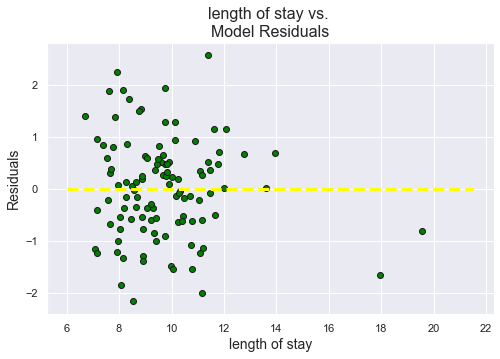

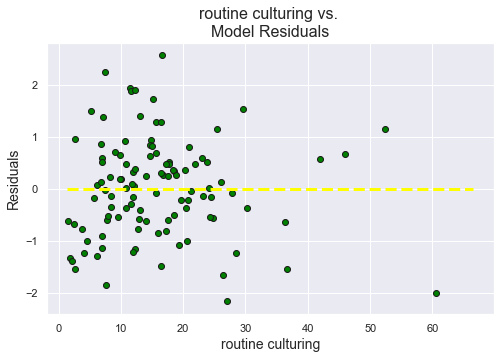

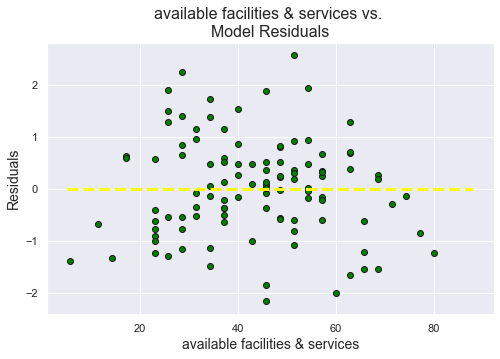

In [23]:
for c in best_feats:
    plt.figure(figsize = (8,5))
    plt.title('{} vs. \nModel Residuals'.format(c),
              fontsize=16)
    
    plt.scatter(x = data[c], y = best_model.resid, 
                color = 'green',
                edgecolor = 'k')
    
    plt.grid(True)
    xmin = min(data[c])
    xmax = max(data[c])
    
    plt.hlines(y=0, 
               xmin = xmin * 0.9,
               xmax = xmax * 1.1,color = 'yellow',
               linestyle = '--',
               lw = 3)
    
    plt.xlabel(c,fontsize = 14)
    
    plt.ylabel('Residuals',
               fontsize = 14)
    plt.show()

Residual plots of best variables show some clustering but overall **assumptions of linearity and independence hold up** since the distribution is random around the 0 axis.

**Fitted vs. Residuals**

By plotting fitted response values vs. residuals, we are checking for **constant variance of the residuals as the response variable increases.** If this isn't the case, it implies that a variable transformation may be needed to improve our model quality.

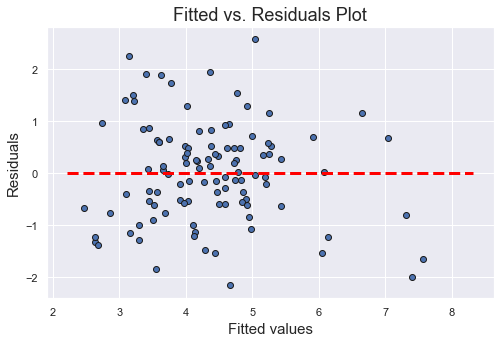

In [24]:
plt.figure(figsize = (8,5))

p=plt.scatter(x = best_model.fittedvalues,
              y = best_model.resid,
              edgecolor='k')

xmin = min(best_model.fittedvalues)
xmax = max(best_model.fittedvalues)
plt.hlines(y = 0,
           xmin = xmin * 0.9,
          xmax = xmax*1.1,
          color = 'red',
          linestyle = '--',
          lw = 3)
plt.xlabel('Fitted values',
          fontsize = 15)
plt.ylabel('Residuals', 
           fontsize = 15)
plt.title('Fitted vs. Residuals Plot', 
          fontsize = 18)
plt.grid(True)
plt.show()

Based on this plot, **homoscedasticity assumption is met.**

**Histogram and Q-Q plot of normalized residuals**

To check the normality assumption, we'll generate a histogram and q-q plot of the normalized residuals.

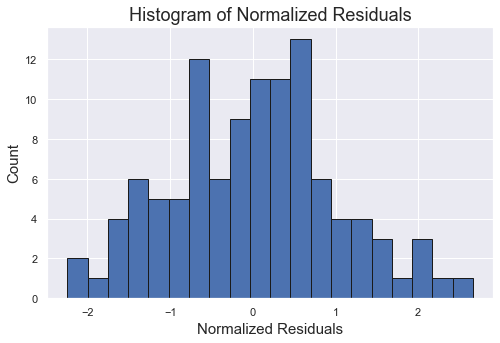

In [25]:
plt.figure(figsize = (8,5))
plt.hist(best_model.resid_pearson,
        bins = 20,
        edgecolor='k')
plt.ylabel('Count',
          fontsize = 15)
plt.xlabel('Normalized Residuals',
          fontsize = 15)
plt.title('Histogram of Normalized Residuals',
         fontsize = 18)
plt.show()

In [26]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

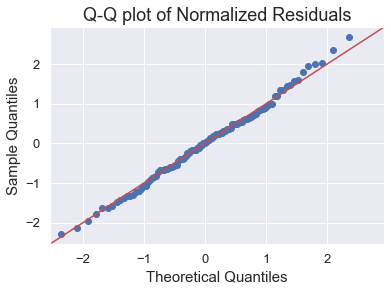

In [27]:
plt.figure(figsize = (8,5))
fig = qqplot(best_model.resid_pearson,
            line = '45',
            fit = 'True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Theoretical Quantiles',
          fontsize = 15)
plt.ylabel('Sample Quantiles',
          fontsize = 15)
plt.title('Q-Q plot of Normalized Residuals',
         fontsize = 18)
plt.grid(True)
plt.show()

Based on the histogram and q-q plot, **the normality assumption is satisfied.**

**Normality: Shapiro-Wilk Test of Residuals**

In [28]:
_, p = scipy.stats.shapiro(best_model.resid)

if p < 0.05:
    print('The Residuals pass this test.')
else:
    print ('Normality NOT confirmed.')

Normality NOT confirmed.


According to the Shapiro-Wilk test, **normality isn't confirmed since the p-values of the residuals aren't all less than alpha = 0.05.** While our residuals fail this normality test, they stilled passed the histogram and q-q plot tests, so we can still assume normality.

**Cook's Distance (To check for outliers in residuals)**

Cook's distance measures how much effect deleting an observation has on the model. A large Cook's distance for a point can be a potential outlier.

In [29]:
from statsmodels.stats.outliers_influence import OLSInfluence as inf

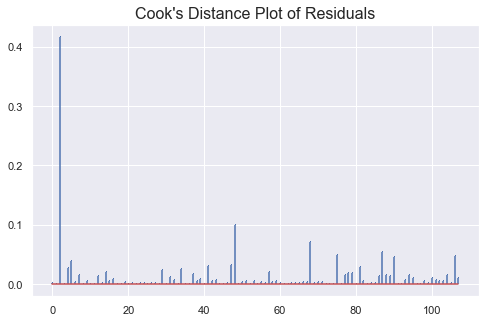

In [30]:
inf = inf(best_model)

(c, p) = inf.cooks_distance
plt.figure(figsize = (8,5))
plt.title("Cook's Distance Plot of Residuals",
         fontsize = 16)
plt.stem(np.arange(len(c)),
        c,
        markerfmt = ',',
        use_line_collection = True)
plt.grid(True)
plt.show()

Based on the Cook's Distance plot, **there are few data points with residuals possibly being outliers.**

**Variance Inflation Factor (VIF)**

The VIF of eacb predictor allows us to check which factors to a degree cause multicollinearity in our model by dividing the ratio of variance in our multi-linear model by the variance of a simple-linear model.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [32]:
for i in range(len(best_feats.columns)):
    v = vif(np.matrix(best_feats), i)
    print('Variance Inflation Factor for {}: {}'.format(best_feats.columns[i],
                                                       round(v,2)))

Variance Inflation Factor for length of stay: 12.14
Variance Inflation Factor for routine culturing: 3.83
Variance Inflation Factor for available facilities & services: 10.19


It seems that two factors in our model, **length of stay** and **available facilities & services**, have VIFs > 10. This means **there is multicollinearity in our model.**

# Prediction & their Intervals

To test our model on patients with IDs 1-5, we shall create a new dataframe with just those rows, and get predictions from our model

In [33]:
# Create test data from patient ids 1-5 with best features
test_data = pd.DataFrame(raw_data[:5], columns=['length of stay',
                                                'routine culturing',
                                                'available facilities & services'])
test_data = test_data.astype(float)
test_data

,length of stay,routine culturing,available facilities & services
3,7.13,9.0,60.0
4,8.82,3.8,40.0
5,8.34,8.1,20.0
6,8.95,18.9,40.0
7,11.20,34.5,40.0


In [34]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [35]:
best_feats.shape

(108, 3)

In [36]:
# Confidence and Prediction Intervals
predictions = best_model.get_prediction(test_data)
predictions.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
3,3.643398,0.199463,3.247899,4.038897,1.692269,5.594527
4,3.432876,0.132405,3.170342,3.695410,1.504299,5.361453
5,3.114035,0.140599,2.835253,3.392818,1.183179,5.044892
6,4.243691,0.093511,4.058275,4.429107,2.324090,6.163291
7,5.662410,0.201839,5.262202,6.062619,3.710321,7.614500


In [38]:
# Predicted Observations
predict = best_model.predict(test_data)
predict

3    3.643398
4    3.432876
5    3.114035
6    4.243691
7    5.662410
dtype: float64